In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alaal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
#load the dataset to pandas dataframe
tweeter_data = pd.read_csv('C:/Users/alaal/Desktop/Projet Fouille de données/TweeterData.csv', encoding='ISO-8859-1')

In [5]:
tweeter_data.tail(10)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
31290,4,1553986702,Sat Apr 18 15:45:28 PDT 2009,NO_QUERY,giloi2009,"@msonline_uk cool, I asked jase when it will b..."
31291,4,1553986710,Sat Apr 18 15:45:28 PDT 2009,NO_QUERY,Kognition,@ky3k I am having a HELL of a time actually. I...
31292,4,1553986721,Sat Apr 18 15:45:28 PDT 2009,NO_QUERY,bollentoff,right....bit of eclipse and bed i think...oooo...
31293,4,1553986757,Sat Apr 18 15:45:29 PDT 2009,NO_QUERY,motorphilia,Working on a new art project -- feeling a litt...
31294,4,1553986774,Sat Apr 18 15:45:26 PDT 2009,NO_QUERY,JessicaKLee,@danielledeleasa congratulations on the birth ...
31295,4,1553986781,Sat Apr 18 15:45:27 PDT 2009,NO_QUERY,BobBroughton,"@Hyper8 hi there, not sure if I said this yet ..."
31296,4,1553986784,Sat Apr 18 15:45:28 PDT 2009,NO_QUERY,sandragrida,"@megan_cooper oh, haha you should ask mike! he..."
31297,4,1553986814,Sat Apr 18 15:45:29 PDT 2009,NO_QUERY,sonyasison,im hoping that everything will be alright by n...
31298,4,1553986872,Sat Apr 18 15:45:30 PDT 2009,NO_QUERY,DreLuvsStarlets,lol Miley thats good to know ive heard that ru...
31299,4,1553986886,Sat Apr 18 15:45:29 PDT 2009,NO_QUERY,thebrownboi,@KimKardashian and we all love you too!


In [6]:
tweeter_data.shape

(31300, 6)

In [7]:
#naming the columns 
col_names = ['target','id','date','flag','user','text']

In [8]:
tweeter_data = pd.read_csv('C:/Users/alaal/Desktop/Projet Fouille de données/TweeterData.csv',names=col_names, encoding='ISO-8859-1')

In [9]:
tweeter_data.head(10)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [10]:
tweeter_data.shape

(31301, 6)

In [11]:
#countin the number of missing values in the dataset
tweeter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [12]:
  #count the number of positive and negative tweets
tweeter_data.target.value_counts()


target
4    21300
0    10001
Name: count, dtype: int64

In [13]:
#convert the traget 4 to 1 
tweeter_data['target'] = tweeter_data['target'].replace(4,1)

In [14]:
tweeter_data.target.value_counts()


target
1    21300
0    10001
Name: count, dtype: int64

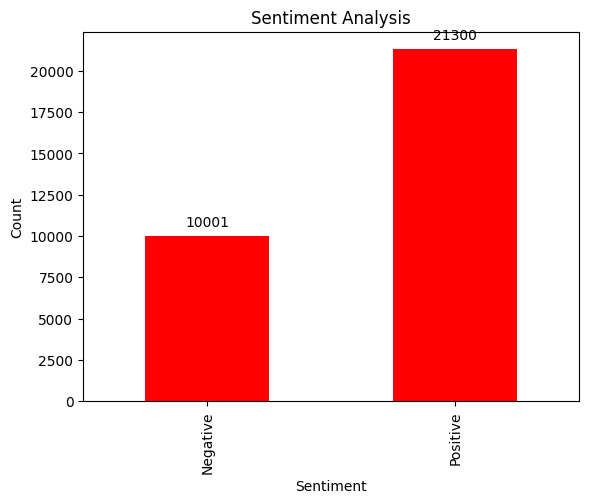

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Map target values to Positive and Negative
tweeter_data['sentiment'] = tweeter_data['target'].map({0: 'Negative', 1: 'Positive'})

# Set the color based on sentiment
color_map = {'Positive': 'green', 'Negative': 'red'}

# Plot the bar chart
ax = tweeter_data['sentiment'].value_counts().sort_index().plot(kind='bar', color=[color_map[s] for s in tweeter_data['sentiment']])

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')

# Show the plot
plt.show()




In [16]:
#steaming the data 
port_stem = PorterStemmer()

In [17]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
    

In [18]:
tweeter_data['stemmed_text'] = tweeter_data['text'].apply(stemming)

In [19]:
tweeter_data.head()

,target,id,date,flag,user,text,sentiment,stemmed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Negative,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Negative,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Negative,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Negative,nationwideclass behav mad see


In [20]:
# separating the data and label
X = tweeter_data['stemmed_text'].values
Y = tweeter_data['target'].values


In [21]:
print(X)
print(Y)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'im hope everyth alright next week'
 'lol miley that good know ive heard rumor miley scorpio born nov right lol'
 'kimkardashian love']
[0 0 0 ... 1 1 1]


In [22]:
#splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [23]:
print(X.shape,x_train.shape,x_test.shape)

(31301,) (25040,) (6261,)


In [24]:
print(Y.shape,y_train.shape,y_test.shape)

(31301,) (25040,) (6261,)


In [25]:
 #convert the text data to numerical data
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)


In [26]:
print(x_train)

  (0, 10105)	0.39971383087757034
  (0, 19205)	0.41572939371467327
  (0, 14177)	0.45287137833546975
  (0, 4806)	0.29084688759779637
  (0, 26948)	0.614584027831845
  (1, 11636)	0.41255609528032605
  (1, 8552)	0.30600298844516477
  (1, 2640)	0.313836547099255
  (1, 10932)	0.18147024464327924
  (1, 4223)	0.3536006071685301
  (1, 22808)	0.2671708836655379
  (1, 2602)	0.3571968621978183
  (1, 23820)	0.24681768293921946
  (1, 21836)	0.46884173649492267
  (2, 4760)	1.0
  (3, 9562)	0.2007278287885728
  (3, 14147)	0.30252898978287807
  (3, 10878)	0.3094511591557643
  (3, 11039)	0.41846306158684776
  (3, 9553)	0.7002489575234975
  (3, 13275)	0.3270544186562041
  (4, 1912)	0.29839121902204274
  (4, 3603)	0.37312371169961417
  (4, 23570)	0.28195354189061766
  (4, 24095)	0.4135676943431757
  :	:
  (25037, 8657)	0.28047763457139785
  (25037, 13111)	0.21246754404330112
  (25037, 4961)	0.29223352792961865
  (25037, 9562)	0.1388992951227928
  (25038, 16419)	0.5708504959360383
  (25038, 7887)	0.346333599

In [27]:
print(x_test)

  (0, 25114)	0.6938720536832336
  (0, 22165)	0.5318825572982457
  (0, 17291)	0.4854302404664238
  (1, 26860)	0.36334014814189275
  (1, 26754)	0.3204362489090689
  (1, 23118)	0.455195546287587
  (1, 7824)	0.5530697998589476
  (1, 5869)	0.2571445822579526
  (1, 3061)	0.43138384540061864
  (2, 24739)	0.35619074457739075
  (2, 15947)	0.7052439186365618
  (2, 10431)	0.45095933530203175
  (2, 2358)	0.4152045840396038
  (3, 22495)	0.23122402482799004
  (3, 21959)	0.40935814894842526
  (3, 18097)	0.3339295934792147
  (3, 17221)	0.2684744422212325
  (3, 8695)	0.29233293649546876
  (3, 6853)	0.30894038964080756
  (3, 5244)	0.31833922061577963
  (3, 2091)	0.4750144087046689
  (3, 1434)	0.29579147846731896
  (4, 26897)	0.33888462304758504
  (4, 23820)	0.4058335838551147
  (4, 17808)	0.49134098534251935
  :	:
  (6257, 4738)	0.27072699294004066
  (6257, 2098)	0.35203130093051815
  (6258, 27425)	0.22924446645862565
  (6258, 26777)	0.23352874424270645
  (6258, 22844)	0.31776232330050164
  (6258, 21728

In [28]:
#training the model
model = LogisticRegression(max_iter=1000)


In [29]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
#accuracy score on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)


In [31]:
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.8313897763578275


In [32]:
#acuracy score on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [33]:
print('Accuracy score of the test data : ',test_data_accuracy)

Accuracy score of the test data :  0.7894904967257627


Model Accuracy = 78.9 % 

In [34]:
#saving the model
import pickle
filename = 'TweeterModel.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
#loading the model
loaded_model = pickle.load(open('C:/Users/alaal/Desktop/Projet Fouille de données/TweeterModel.sav', 'rb'))


In [36]:
#predicting the sentiment of the new tweet with loaded model
x_new = x_test[100]
print(y_test[100])
prediction = loaded_model.predict(x_new)
print(prediction)


0
[0]


In [37]:
#predicting the sentiment of the new tweet
input_data = "I am bad today"
input_data = vectorizer.transform([input_data])
prediction = loaded_model.predict(input_data)
print(prediction)




[0]


In [38]:
#predicting the sentiment of the new tweet
input_data = "I am in good mood today"
input_data = vectorizer.transform([input_data])
prediction = loaded_model.predict(input_data)
print(prediction)

[1]


In [39]:
#create fonction if the prediction is 1 then the tweet is positive else it is negative
def prediction(input_data):
    input_data = vectorizer.transform([input_data])
    prediction = loaded_model.predict(input_data)
    if prediction == 1:
        return "Positive"
    else:
        return "Negative"

In [40]:
#predicting the sentiment of the new tweet
input_data = "I am in good mood today"
prediction(input_data)


'Positive'

In [41]:
input_data = "I am bad today"
prediction(input_data)

'Negative'